In [1]:
from keras.datasets import mnist

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


3


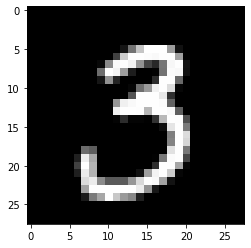

In [8]:
plt.imshow(X_test[90],cmap = "gray")
plt.plot()
print(Y_test[90])

In [11]:
#As the training data is huge we are goiing to do the pca on test dataset
X = X_test.reshape(-1,28*28)
Y = Y_test
print(X.shape,Y.shape)

(10000, 784) (10000,)


 Data Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X.shape)

(10000, 784)


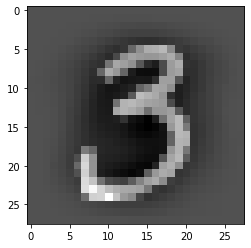

In [14]:
plt.imshow(X[90].reshape(28,28),cmap ="gray")
plt.show()

## Sklarn PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components = 2)
Z_pca = pca.fit_transform(X)

In [19]:
print(Z_pca.shape)
print(pca.explained_variance_)


(10000, 2)
[41.39893397 28.35105785]


In [21]:
Z_pca

array([[-5.458276  ,  6.41432656],
       [ 2.80450507, -8.02946004],
       [-7.41123295, -3.86388612],
       ...,
       [-5.00433581,  1.15423165],
       [-1.42098665, -4.42450256],
       [13.14277574, -4.26185533]])

## Custom PCA

In [22]:
#compute covarience matrix
cova = np.dot(X.T,X)
print(cova.shape)

(784, 784)


In [24]:
# Calculate eigen vector using svd
from numpy.linalg import svd


In [27]:
U,S,V = svd(cova)

In [28]:
print(U.shape)
Ured = U[:,:2] #As we only want 2 dimension
print(Ured.shape)

(784, 784)
(784, 2)


In [29]:
#Projection of data on the new axis
Z = np.dot(X,Ured)
print(Z.shape)

(10000, 2)


In [31]:
Z # Negative because of direction
print(-Z)

[[-5.45831116  6.41400668]
 [ 2.80443233 -8.02885014]
 [-7.41124146 -3.86404387]
 ...
 [-5.00435204  1.15364641]
 [-1.42085442 -4.42308066]
 [13.14268302 -4.26280299]]


## Visualization

In [32]:
import pandas as pd

In [33]:
new_datasets = np.hstack((Z,Y.reshape(-1,1)))
new_datasets

array([[  5.45831116,  -6.41400668,   7.        ],
       [ -2.80443233,   8.02885014,   2.        ],
       [  7.41124146,   3.86404387,   1.        ],
       ...,
       [  5.00435204,  -1.15364641,   4.        ],
       [  1.42085442,   4.42308066,   5.        ],
       [-13.14268302,   4.26280299,   6.        ]])

In [34]:
dataframe = pd.DataFrame(new_datasets,columns = ["PC1","PC2","label"])
dataframe.head()

,PC1,PC2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


In [35]:
import seaborn as sns

<Figure size 720x1080 with 0 Axes>

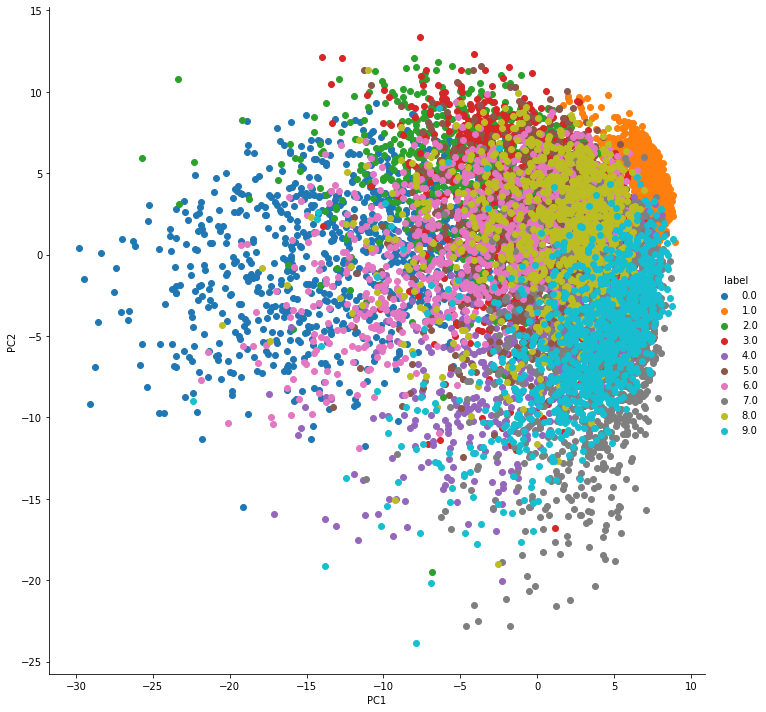

In [38]:
plt.figure(figsize=(10,15))
# sns.FacetGrid(dataframe,hue="label",height=10)\
# .map(plt.scatter,"PC1","PC2")\
# .add_legend()
fig = sns.FacetGrid(dataframe,hue = "label",height = 10)
fig.map(plt.scatter,"PC1","PC2")
fig.add_legend()
plt.show()

# we can see the clear seperation 

## PCA with 784 dimensions

In [39]:
pca = PCA()

In [40]:
Z_pca = pca.fit_transform(X)

In [41]:
pca.explained_variance_ #As we go lower it will be decressed 
#this is not the orignal dataset it is new features

array([4.13989340e+01, 2.83510581e+01, 2.70196465e+01, 2.15824995e+01,
       1.84057252e+01, 1.60945634e+01, 1.36639090e+01, 1.25807315e+01,
       1.11624006e+01, 1.01380790e+01, 9.83450164e+00, 8.75790204e+00,
       8.38544770e+00, 7.97784570e+00, 7.64886637e+00, 7.31512409e+00,
       6.89333872e+00, 6.64082579e+00, 6.32396933e+00, 6.08974669e+00,
       5.94234357e+00, 5.78338241e+00, 5.65926201e+00, 5.48906732e+00,
       5.25427495e+00, 5.14680013e+00, 5.05462485e+00, 4.89770948e+00,
       4.73536524e+00, 4.56603235e+00, 4.46677346e+00, 4.37046128e+00,
       4.32323658e+00, 4.15557409e+00, 4.03609421e+00, 3.95423005e+00,
       3.88875015e+00, 3.82939953e+00, 3.77880871e+00, 3.69226086e+00,
       3.68222396e+00, 3.66141824e+00, 3.56686939e+00, 3.47145867e+00,
       3.42387456e+00, 3.33512759e+00, 3.32686280e+00, 3.26786201e+00,
       3.19850249e+00, 3.13279782e+00, 3.07617536e+00, 3.03401082e+00,
       2.97856834e+00, 2.94000449e+00, 2.89943744e+00, 2.83019996e+00,
      

In [44]:
pca.explained_variance_ratio_ #ratio
# same as
#pca.explained_variance_/np.sum(pca.explained_variance_)

array([6.19682546e-02, 4.24374595e-02, 4.04445278e-02, 3.23059001e-02,
       2.75507255e-02, 2.40912485e-02, 2.04529082e-02, 1.88315470e-02,
       1.67085095e-02, 1.51752473e-02, 1.47208356e-02, 1.31093207e-02,
       1.25518101e-02, 1.19416885e-02, 1.14492537e-02, 1.09496895e-02,
       1.03183374e-02, 9.94036184e-03, 9.46607325e-03, 9.11547562e-03,
       8.89483433e-03, 8.65689233e-03, 8.47110191e-03, 8.21634492e-03,
       7.86489450e-03, 7.70402013e-03, 7.56604698e-03, 7.33116722e-03,
       7.08816124e-03, 6.83469424e-03, 6.68611794e-03, 6.54195245e-03,
       6.47126385e-03, 6.22029721e-03, 6.04145299e-03, 5.91891411e-03,
       5.82090011e-03, 5.73206076e-03, 5.65633358e-03, 5.52678388e-03,
       5.51176009e-03, 5.48061691e-03, 5.33909088e-03, 5.19627473e-03,
       5.12504816e-03, 4.99220670e-03, 4.97983549e-03, 4.89151980e-03,
       4.78769856e-03, 4.68934811e-03, 4.60459243e-03, 4.54147817e-03,
       4.45848874e-03, 4.40076420e-03, 4.34004117e-03, 4.23640261e-03,
      

In [45]:
#Cummulative varience
cum_var_expalined = np.cumsum(pca.explained_variance_ratio_)
cum_var_expalined

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

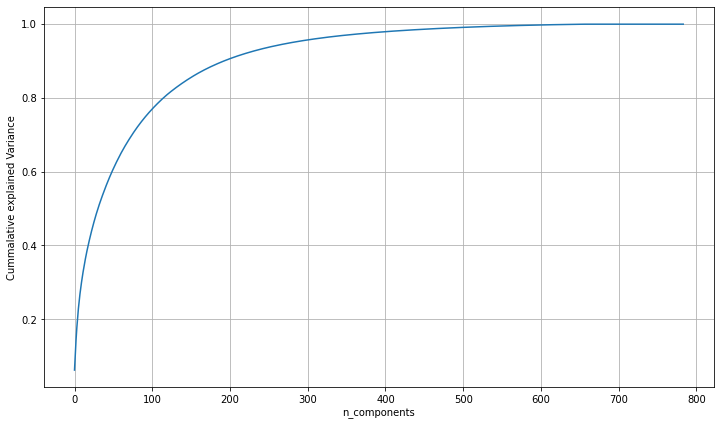

In [51]:
plt.figure(figsize = (12,7))
plt.plot(cum_var_expalined)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummalative explained Variance")
plt.show()

As if we extract the 300 componenets then we will get the near about 95% of the data cover